In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def generate_linear(n = 100):
    """
    generate 100 linear point
    
    return : points and labels
    """
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1] : 
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)    
        
def generate_XOR_easy():
    """
    generate 21 XOR point
    
    return : points and labels
    """
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 *i, 0.1*i])
        labels.append(0)
        if(0.1 * i == 0.5) :
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

    

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def der_sigmoid(x):
    # input x must be the value which is the output from sigmoid function
    return x * (1 - x)

In [4]:
class NNwork:
    def __init__(self,neurons_per_layer = (10, 10)):
        self.lr = 0.2
        self.epoch = 20000
        self.EPS=1e-3
        self.w1 = np.random.rand(neurons_per_layer[0],2)
        self.w2 = np.random.rand(neurons_per_layer[1],neurons_per_layer[0])
        self.w3 = np.random.rand(1,neurons_per_layer[1])
    
    def loss_function(self, pred_y, label_y):
        '''
        choose cross entrophy as loss function
        '''
        loss=-(1/label_y.shape[0])*(label_y.T@np.log(pred_y+self.EPS).T+(1-label_y.T)@np.log(1-pred_y+self.EPS).T)
        return float(np.abs(loss))

        
    def forward(self, inputs):
        '''
        x-> w1-> z1-> a1-> w2-> z2-> a2-> w3-> z3-> a3
        '''
        self.x = inputs.T
        self.z1 = self.w1@self.x
        self.a1 = sigmoid(self.z1)
        self.z2 = self.w2@self.a1
        self.a2 = sigmoid(self.z2)
        self.z3 = self.w3@self.a2
        self.a3 = sigmoid(self.z3)
        return self.a3
    
    def backward(self,label_y):

        batch_size = label_y.shape[0]
        #calculate der_C_z3
        der_c_a3 = -(label_y.T/(self.a3)-(1-label_y.T)/(1-self.a3))
       
        der_a3_z3 = der_sigmoid(self.a3)

        der_c_z3 = der_c_a3*der_a3_z3 
        #calculate der_C_z2
        der_c_z2 = self.w3.T@der_c_z3*der_sigmoid(self.a2)
        
        #calculate der_C_z1
        der_c_z1 = self.w2.T@der_c_z2*der_sigmoid(self.a1) 
        
        # calculate gradient of weight
        grad_W3 = der_c_z3@(self.a2).T*(1/batch_size)   
        grad_W2 = der_c_z2@(self.a1).T*(1/batch_size)
        grad_W1 = der_c_z1@(self.x).T*(1/batch_size)
        
        # update
        self.w1 -= self.lr*grad_W1
        self.w2 -= self.lr*grad_W2
        self.w3 -= self.lr*grad_W3
        return
    
    def calculate_accuracy(self, pred_y, labels_y):
        pred_y = pred_y.reshape(-1,1)
        pred_y = np.round(pred_y) 
        correct = np.sum(pred_y == labels_y)
        total = labels_y.shape[0]  
        accuracy = (correct / total) * 100  
        return accuracy
        
    def train_network(self, inputs, labels_y):
        for epoch in range(self.epoch):
            pred_y = self.forward(inputs)
            self.backward(labels_y)
            if epoch % 1000 == 0:
                loss = self.loss_function(pred_y, labels_y)
                accuracy = self.calculate_accuracy(pred_y, labels_y)
                learning_epoch.append(epoch)
                learning_loss.append(np.mean(loss))

                print(f"Epoch: {epoch}, Loss: {np.mean(loss)}, Accuracy: {accuracy:.2f}%")
        print("Training finished.")
        
    def test_network(self, inputs, labels_y):
        print('start testing:')
        pred_y = self.forward(inputs)
        print(pred_y)
        loss = self.loss_function(pred_y, labels_y)
        accuracy = self.calculate_accuracy(pred_y, labels_y)
        print(f"Loss: {np.mean(loss)}, Accuracy: {accuracy:.2f}%")
        print('testing finished')

In [5]:
def show_result(x, y,pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

    plt.show()
    

Epoch: 0, Loss: 1.6362359958292254, Accuracy: 53.00%
Epoch: 1000, Loss: 0.6891193048793878, Accuracy: 53.00%
Epoch: 2000, Loss: 0.6882638904623698, Accuracy: 53.00%
Epoch: 3000, Loss: 0.6826429815324577, Accuracy: 53.00%
Epoch: 4000, Loss: 0.1240669253160268, Accuracy: 100.00%
Epoch: 5000, Loss: 0.03953806130577094, Accuracy: 100.00%
Epoch: 6000, Loss: 0.02377959290489619, Accuracy: 100.00%
Epoch: 7000, Loss: 0.016924166510086762, Accuracy: 100.00%
Epoch: 8000, Loss: 0.013026880744464413, Accuracy: 100.00%
Epoch: 9000, Loss: 0.010492291949551969, Accuracy: 100.00%
Epoch: 10000, Loss: 0.008703342245302042, Accuracy: 100.00%
Epoch: 11000, Loss: 0.007369300990748787, Accuracy: 100.00%
Epoch: 12000, Loss: 0.006334602258779035, Accuracy: 100.00%
Epoch: 13000, Loss: 0.005508142387576927, Accuracy: 100.00%
Epoch: 14000, Loss: 0.00483282694511224, Accuracy: 100.00%
Epoch: 15000, Loss: 0.004270933999772055, Accuracy: 100.00%
Epoch: 16000, Loss: 0.003796465045356318, Accuracy: 100.00%
Epoch: 170

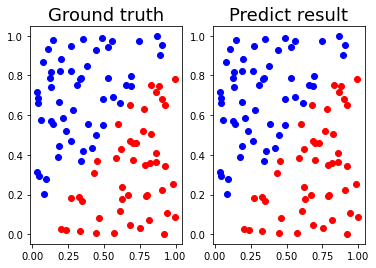

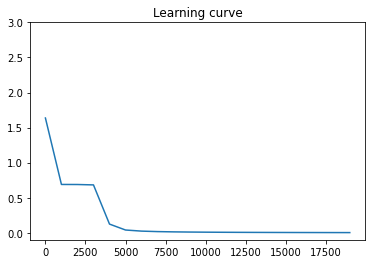

In [6]:
learning_epoch = []
learning_loss = []
linear_data, linear_labels= generate_linear(n = 100)

neural_network = NNwork()
neural_network.train_network(linear_data, linear_labels)  
neural_network.test_network(linear_data, linear_labels)
pred_y=neural_network.forward(linear_data)
pred_y = pred_y.reshape(-1,1)
pred_y = np.round(pred_y)

show_result(linear_data, linear_labels, pred_y)

plt.figure()
plt.ylim(-0.1,3)
plt.title('Learning curve')
plt.plot(learning_epoch, learning_loss)

plt.show()

Epoch: 0, Loss: 2.566003981822393, Accuracy: 47.62%
Epoch: 1000, Loss: 0.6900860274226401, Accuracy: 52.38%
Epoch: 2000, Loss: 0.6899601262063634, Accuracy: 52.38%
Epoch: 3000, Loss: 0.6898045751418741, Accuracy: 52.38%
Epoch: 4000, Loss: 0.6895812849898505, Accuracy: 52.38%
Epoch: 5000, Loss: 0.6892046595449645, Accuracy: 52.38%
Epoch: 6000, Loss: 0.6884258848140824, Accuracy: 52.38%
Epoch: 7000, Loss: 0.6862146059411749, Accuracy: 52.38%
Epoch: 8000, Loss: 0.6769124235239233, Accuracy: 52.38%
Epoch: 9000, Loss: 0.6397823101544695, Accuracy: 66.67%
Epoch: 10000, Loss: 0.5440027566123934, Accuracy: 80.95%
Epoch: 11000, Loss: 0.2725880830773521, Accuracy: 90.48%
Epoch: 12000, Loss: 0.1284035524767832, Accuracy: 100.00%
Epoch: 13000, Loss: 0.0674870445520791, Accuracy: 100.00%
Epoch: 14000, Loss: 0.034598349274066756, Accuracy: 100.00%
Epoch: 15000, Loss: 0.019202579502013872, Accuracy: 100.00%
Epoch: 16000, Loss: 0.011863947042936659, Accuracy: 100.00%
Epoch: 17000, Loss: 0.007980757626

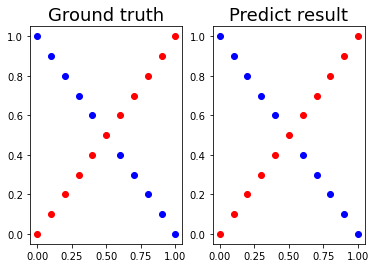

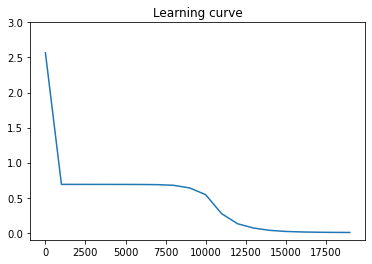

In [7]:
learning_epoch = []
learning_loss = []
xor_data, xor_labels= generate_XOR_easy()

neural_network = NNwork()
neural_network.train_network(xor_data, xor_labels)  
neural_network.test_network(xor_data, xor_labels) 
pred_y=neural_network.forward(xor_data)
pred_y = pred_y.reshape(-1,1)
pred_y = np.round(pred_y)

show_result(xor_data, xor_labels, pred_y)

plt.figure()
plt.ylim(-0.1,3)
plt.title('Learning curve')
plt.plot(learning_epoch, learning_loss)

plt.show()